In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

# Use the citipy module to determine city based on 
# latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module 
# from the datetime library 
import time
from datetime import datetime


In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# NOTE
# You can only unzip a zipped tuple once before it is removed from 
# the computer's memory. Make sure you unzip the latitudes and 
# longitudes into the coordinates list before moving on.

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-62.78329627440402 -146.5229302975284
-61.149126312392724 -70.77932666281818
56.306815875365146 -81.08433535848157
-84.65981615587619 157.4147692891707
-29.66299815085315 -29.02325432682602
-13.146692166712938 51.86562462349542
-27.49904798221484 -89.23565740820713
-59.437890828983775 -122.6796683674134
45.37857374673831 75.08615579971581
-45.546314948771006 32.05326203811515
-70.97679304388288 16.00211550357838
-19.021522938282303 130.57331250241288
22.384999872150658 58.284563646428865
2.474401383855252 153.09859720447326
-6.303742031458938 -36.89151080912063
-61.23989765235282 -165.54328492822808
51.323585616660125 -171.80902247425212
48.623002442309996 -131.2467782871384
61.63805930326433 -34.248392731242205
-68.55561202991119 -112.69725199810719
-24.561417166824484 6.2703659251457395
66.43593250954743 -24.9545927033937
-35.626802881957396 27.220557182283727
46.06331852186287 43.71793799798226
-54.975619356882824 -123.85662492364568
-16.411355139412535 54.262754532111956
-79.064292

-50.818704617850635 -130.04346340214403
-27.278605062980304 -52.332589567891105
64.89187051579336 81.08307556838264
-88.66813837279949 -61.97545646243182
-89.41552885960579 19.103672649299625
5.176955338450043 159.45852973012
-65.3712768085143 -98.71407924477552
30.877970261433234 -42.093217985489474
-0.7839914578792673 -110.83822811160107
-9.55451738095698 -155.65135496017894
-37.757530926037305 -135.36871466807662
-52.88510591714405 135.51635810487204
57.69847843369578 88.65621172490273
-83.22877532086437 -61.596822855135954
77.88043713659246 95.73575566224969
-30.100038130306558 -41.050544597782306
74.45793428396914 106.61479427876361
-30.259057910480685 108.3378811325469
-25.36717146419106 -149.05899796260124
-23.144613360268025 -173.50633884100387
85.56621862412507 -134.11895745969818
-75.49770585532772 -83.6935841511915
52.58378710791072 149.49976355631685
-57.172222453865956 90.05618579937902
0.5784042184763791 -111.10389977942481
10.370477809739427 175.46950081300878
-37.405868

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [ ]:
# We create the for loop with the enumerate() method and reference the index and the city in the list.

# In the conditional statement, we check if the remainder of the index 
# divided by 50...
###### "%" = Modulus
# ... is equal to 0 and if the index is greater than or equal to 50. 
# If the statement is true, then the set_count 
###### ?????? and the record_count are incremented by 1.


# Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        ### Why is "record_count = 1" here? =1 above, +=1 below.
        ### How is it incrementing? Shouldn't it reset to 1 in each loop?
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | sambava
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | gulshat
City not found. Skipping...
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | ibra
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | caico
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | port hardy
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | henties bay
Processing Record 2

Processing Record 37 of Set 4 | neftcala
Processing Record 38 of Set 4 | nanortalik
Processing Record 39 of Set 4 | eureka
Processing Record 40 of Set 4 | cap malheureux
Processing Record 41 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 4 | zelenoborskiy
Processing Record 43 of Set 4 | itarema
Processing Record 44 of Set 4 | samarai
Processing Record 45 of Set 4 | hovd
Processing Record 46 of Set 4 | port augusta
Processing Record 47 of Set 4 | craig
Processing Record 48 of Set 4 | baykit
Processing Record 49 of Set 4 | da nang
Processing Record 50 of Set 4 | moussoro
Processing Record 1 of Set 5 | chaumont
Processing Record 2 of Set 5 | tipuani
Processing Record 3 of Set 5 | oyama
Processing Record 4 of Set 5 | santa barbara
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | havre-saint-pierre
Processing Record 7 of Set 5 | gizo
Processing Record 8 of Set 5 | ahipara
Processing Record 9 of Set 5 | doctor pedro p. pena
City not found.

Processing Record 27 of Set 8 | luanda
Processing Record 28 of Set 8 | bridlington
Processing Record 29 of Set 8 | valkeala
Processing Record 30 of Set 8 | sabancuy
Processing Record 31 of Set 8 | nakhon thai
Processing Record 32 of Set 8 | sangar
Processing Record 33 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 34 of Set 8 | chetani
Processing Record 35 of Set 8 | betanzos
Processing Record 36 of Set 8 | nome
Processing Record 37 of Set 8 | fukue
Processing Record 38 of Set 8 | verkhnyaya inta
Processing Record 39 of Set 8 | sheridan
Processing Record 40 of Set 8 | marsaxlokk
Processing Record 41 of Set 8 | makakilo city
Processing Record 42 of Set 8 | tiksi
Processing Record 43 of Set 8 | zelenogorskiy
Processing Record 44 of Set 8 | lima
Processing Record 45 of Set 8 | rafsanjan
Processing Record 46 of Set 8 | nanchong
Processing Record 47 of Set 8 | salinopolis
Processing Record 48 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 8 | v

Processing Record 8 of Set 12 | mugur-aksy
Processing Record 9 of Set 12 | beloha
Processing Record 10 of Set 12 | juneau
Processing Record 11 of Set 12 | pervomayskoye
Processing Record 12 of Set 12 | kirakira
Processing Record 13 of Set 12 | melo
Processing Record 14 of Set 12 | mangit
Processing Record 15 of Set 12 | kouango
Processing Record 16 of Set 12 | pacasmayo
Processing Record 17 of Set 12 | klaksvik
Processing Record 18 of Set 12 | almeirim
Processing Record 19 of Set 12 | poya
Processing Record 20 of Set 12 | biloela
Processing Record 21 of Set 12 | madang
Processing Record 22 of Set 12 | svetlyy
Processing Record 23 of Set 12 | ilama
Processing Record 24 of Set 12 | birao
Processing Record 25 of Set 12 | teknaf
Processing Record 26 of Set 12 | arawa
Processing Record 27 of Set 12 | salym
Processing Record 28 of Set 12 | tessalit
Processing Record 29 of Set 12 | wakkanai
Processing Record 30 of Set 12 | harlingen
Processing Record 31 of Set 12 | urusha
Processing Record 32

In [24]:
len(city_data)

541

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,53.47,57,98,12.55,NZ,2022-07-17 21:36:24
1,Ushuaia,-54.8000,-68.3000,40.66,48,20,10.36,AR,2022-07-17 21:33:51
2,Bluff,-46.6000,168.3333,53.80,64,100,20.62,NZ,2022-07-17 21:36:25
3,Sao Joao Da Barra,-21.6403,-41.0511,75.29,84,100,20.18,BR,2022-07-17 21:36:25
4,Sambava,-14.2667,50.1667,69.87,83,83,14.72,MG,2022-07-17 21:36:26
5,Coquimbo,-29.9533,-71.3436,58.73,54,0,9.22,CL,2022-07-17 21:36:26
6,Rikitea,-23.1203,-134.9692,73.17,81,89,13.47,PF,2022-07-17 21:32:47
7,Port Alfred,-33.5906,26.8910,68.94,36,0,12.08,ZA,2022-07-17 21:36:27
8,Bredasdorp,-34.5322,20.0403,53.22,87,0,4.25,ZA,2022-07-17 21:34:14
9,Kununurra,-15.7667,128.7333,49.98,87,4,0.00,AU,2022-07-17 21:36:28


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [27]:
city_data_df = city_data_df[new_column_order]

In [28]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-07-17 21:36:24,-46.1927,168.8643,53.47,57,98,12.55
1,Ushuaia,AR,2022-07-17 21:33:51,-54.8000,-68.3000,40.66,48,20,10.36
2,Bluff,NZ,2022-07-17 21:36:25,-46.6000,168.3333,53.80,64,100,20.62
3,Sao Joao Da Barra,BR,2022-07-17 21:36:25,-21.6403,-41.0511,75.29,84,100,20.18
4,Sambava,MG,2022-07-17 21:36:26,-14.2667,50.1667,69.87,83,83,14.72


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

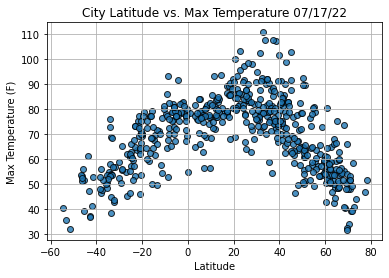

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

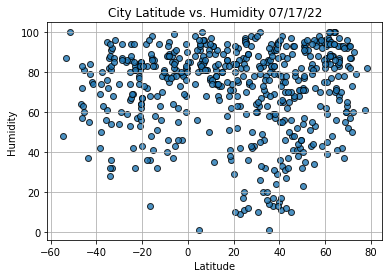

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

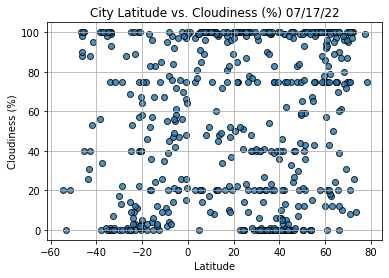

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

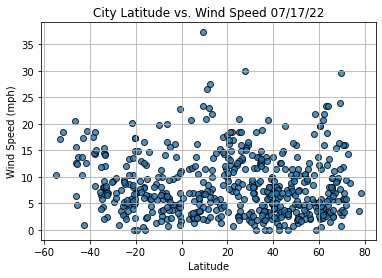

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# (I hope we eventually learn how to parse the "fig.png" names 
# so we can automatically input the x and y axes into them.)